<a href="https://colab.research.google.com/github/maulik987/maulik/blob/main/22BCE3446.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset (Replace 'your_dataset.csv' with your actual file path)
try:
    df = pd.read_csv('your_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset file not found.")
    df = None # prevent further code from running if file not found

if df is not None:
    # 1. Dimension
    print("\n--- Dimension ---")
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])

    # 2. Summary
    print("\n--- Summary (Info) ---")
    print(df.info())

    print("\n--- Summary (Describe) ---")
    print(df.describe())

    # 3. Data Handling (Basic)
    print("\n--- Data Handling (First 5 Rows) ---")
    print(df.head())

    # Check for missing values
    print("\n--- Missing Values ---")
    print(df.isnull().sum())

    # 4. Data Cleaning
    # Example: Handling missing values (replace with mean for numerical columns)
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
    # Example: Drop rows with any NA values
    #df.dropna(inplace=True)
    # Example: Drop duplicate rows
    #df.drop_duplicates(inplace=True)

    print("\n--- Missing Values after Handling ---")
    print(df.isnull().sum())

    # 5. Univariate Analysis

    # Numerical Columns
    numerical_cols = df.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

    # Categorical Columns
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        if len(df[col].unique()) < 20: #avoid large value counts
            plt.figure(figsize=(8, 5))
            sns.countplot(x=df[col])
            plt.title(f'Countplot of {col}')
            plt.xticks(rotation=45)
            plt.show()

        else:
            print(f"Column {col} has too many unique values for countplot. Consider other analysis.")

    # 6. Bivariate Analysis

    # Numerical vs. Numerical
    for i in range(len(numerical_cols)):
        for j in range(i + 1, len(numerical_cols)):
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=df[numerical_cols[i]], y=df[numerical_cols[j]])
            plt.title(f'{numerical_cols[i]} vs {numerical_cols[j]}')
            plt.show()

            plt.figure(figsize=(8, 5))
            sns.regplot(x=df[numerical_cols[i]], y=df[numerical_cols[j]])
            plt.title(f'{numerical_cols[i]} vs {numerical_cols[j]} with Regression')
            plt.show()

    # Numerical vs. Categorical
    for num_col in numerical_cols:
        for cat_col in categorical_cols:
            if len(df[cat_col].unique()) < 20:
                plt.figure(figsize=(8, 5))
                sns.boxplot(x=df[cat_col], y=df[num_col])
                plt.title(f'{num_col} vs {cat_col}')
                plt.xticks(rotation=45)
                plt.show()

                plt.figure(figsize=(8, 5))
                sns.violinplot(x=df[cat_col], y=df[num_col])
                plt.title(f'{num_col} vs {cat_col} (Violin)')
                plt.xticks(rotation=45)
                plt.show()

    # Categorical vs. Categorical
    for i in range(len(categorical_cols)):
        for j in range(i + 1, len(categorical_cols)):
            if len(df[categorical_cols[i]].unique()) < 20 and len(df[categorical_cols[j]].unique()) < 20:
                plt.figure(figsize=(8, 5))
                ct = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]])
                sns.heatmap(ct, annot=True, cmap='Blues')
                plt.title(f'{categorical_cols[i]} vs {categorical_cols[j]}')
                plt.show()

    # 7. Multivariate Analysis

    # Correlation Matrix (Numerical)
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Pairplot (Numerical)
    if len(numerical_cols) <= 7: #avoid huge pairplots
        sns.pairplot(df[numerical_cols])
        plt.title('Pairplot')
        plt.show()

    else:
        print("Too many numerical columns to generate pairplot. Consider selecting a few.")
    # Example: Scatterplot Matrix with hue (Categorical)
    if len(numerical_cols) >= 3 and len(categorical_cols) > 0 and len(df[categorical_cols[0]].unique()) < 10:
        try:
            sns.pairplot(df[numerical_cols], hue=categorical_cols[0])
            plt.title('Pairplot with Hue')
            plt.show()
        except:
            print("Error generating hue pairplot. Ensure categorical column has fewer than 10 unique values.")

import pandas as pd
import numpy as np
dataFrame1 =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                            'Score' : [45,56,67,89,25,45,45,67,89,66,89,56,89,99,90,]})
dataFrame2 =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
                            'Score': [79,78,69,89,79,80,90,89,87,86,85,86,68,69,70]})
dataframe = pd.concat([dataFrame1, dataFrame2], ignore_index=True)

dataframe

pd.concat([dataFrame1, dataFrame2], axis=1)

df1SE =  pd.DataFrame({ 'StudentID': [9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                       'ScoreSE' : [22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
df2SE =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
                       'ScoreSE': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})

df1ML =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                       'ScoreML' : [46,56,78,67,65,78,89,80,78,90,78,87,87,89,78]})
df2ML =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                       'ScoreML': [87,45,34,54,65,43,76,78,85,87]})

dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = pd.concat([dfML, dfSE], axis=1)
df

dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='inner')
df

dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='left')
df

dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='right')
df

df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/sales.csv')
df.head(10)

df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df.head(10)

df['Company'].value_counts()

df.describe()

data = np.arange(15).reshape((3,5))
indexers = ['Rainfall', 'Humidity', 'Wind']
dframe1 = pd.DataFrame(data, index=indexers, columns=['Bergen', 'Oslo', 'Trondheim', 'Stavanger', 'Kristiansand'])
dframe1

stacked = dframe1.stack()
stacked

stacked.unstack()

series1 = pd.Series([111,222,333,444], index=['ones', 'twos', 'threes','fours'])
series2 = pd.Series([555, 666,777], index=['fours', 'fives', 'sixs'])

frame2 = pd.concat([series1, series2], keys=['Number1', 'Number2'])
frame2.unstack()

frame3 = pd.DataFrame({'column 1': ['Looping'] * 3 +
 ['Functions'] * 4, 'column 2': [15, 15, 25, 26, 26, 27, 27]})
frame3

frame3.duplicated()

frame4 = frame3.drop_duplicates()
frame4

frame3['column 3'] = range(7)
frame5 = frame3.drop_duplicates(['column 2'])
frame5

replaceFrame = pd.DataFrame({'column 1': [400.00, 4000., -986.,
            555., 345., 554., -886., 432., 4444. ], 'column 2': range(9)})
replaceFrame

replaceFrame.replace(to_replace =-886, value= np.nan)

replaceFrame = pd.DataFrame({'column 1': [400.00, 4000., -986.,
            555., 345., 554., -886., 432., 4444 ], 'column 2': range(9)})
replaceFrame.replace(to_replace =[-886, 0], value= [np.nan,2])


data = np.arange(15, 30).reshape(5, 3)
dfx = pd.DataFrame(data, index=['apricot', 'mango', 'pineapple',
'grapefruit', 'papaya'], columns=['store1', 'store2', 'store3'])
dfx

dfx['store4'] = np.nan
dfx.loc['watermelon'] = np.arange(15, 19)
dfx.loc['oranges'] = np.nan
dfx['store5'] = np.nan
dfx['store4']['apple'] = 20.
dfx

dfx.isnull()

dfx.notnull()

dfx.isnull().sum()

dfx.isnull().sum().sum()

dfx.count()

dfx.store4[dfx.store4.notnull()]

dfx.store4.dropna()

dfx.dropna()

dfx.dropna(how='all')

dfx.dropna(how='all', axis=1)

dfx.dropna(thresh=5, axis=1)

ar1 = np.array([150, 350, np.nan, 450])
ser1 = pd.Series(ar1)
ar1.mean(), ser1.mean()

ser2 = dfx.store4
ser2.sum()

ser2.mean()

ser2.cumsum()

filledDf = dfx.fillna(0)
filledDf

dfx.mean()

filledDf.mean()

dfx.store4.fillna(method='ffill')

dfx.store4.fillna(method='bfill')

height = [110, 122, 125, 128, 130, 133, 137, 139, 161, 145, 141, 132]

import pandas as pd
bins = [105, 125, 145, 150, 200]
category = pd.cut(height, bins)
category

pd.value_counts(category)

bin_names = ['Short Height', 'Average height', 'Good Height', 'Taller']
pd.cut(height, bins, labels=bin_names)

import numpy as np

pd.cut(np.random.rand(40), 5, precision=2)

randomNumbers = np.random.rand(2000)
category3 = pd.qcut(randomNumbers, 4) # cut into quartiles
category3

pd.value_counts(category3)

df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/sales.csv')
df.head(10)

df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df

TotalTransaction = df["TotalPrice"]
TotalTransaction[np.abs(TotalTransaction) > 3000000]

df[np.abs(TotalTransaction) > 6741112]


Error: Dataset file not found.


<ipython-input-115-cfc4a78e6f6b>:247: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfx['store4']['apple'] = 20.
<ipython-input-115-cfc4a78e6f6b>:290: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future versio

,Account,Company,Order,SKU,Country,Year,Quantity,UnitPrice,transactionComplete,TotalPrice
818,123456781,Gen Power,99991,s1-supercomputer,Burkina Faso,1985,9693,696,False,6746328
1402,123456778,Will LLC,99985,s11-supercomputer,Austria,1990,9844,695,True,6841580
2242,123456770,Name IT,99997,s9-supercomputer,Myanmar,1979,9804,692,False,6784368
2876,123456772,Gen Power,99992,s10-supercomputer,Mali,2007,9935,679,False,6745865
3210,123456782,Loolo INC,99991,s8-supercomputer,Kuwait,2006,9886,692,False,6841112
3629,123456779,My SQ Man,99980,s3-supercomputer,Hong Kong,1994,9694,700,False,6785800
7674,123456781,Loolo INC,99989,s6-supercomputer,Sri Lanka,1994,9882,691,False,6828462
8645,123456789,Gen Power,99996,s11-supercomputer,Suriname,2005,9742,699,False,6809658
8684,123456785,Gen Power,99989,s2-supercomputer,Kenya,2013,9805,694,False,6804670


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   

  highway-mpg  price  
0          27  13495  

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


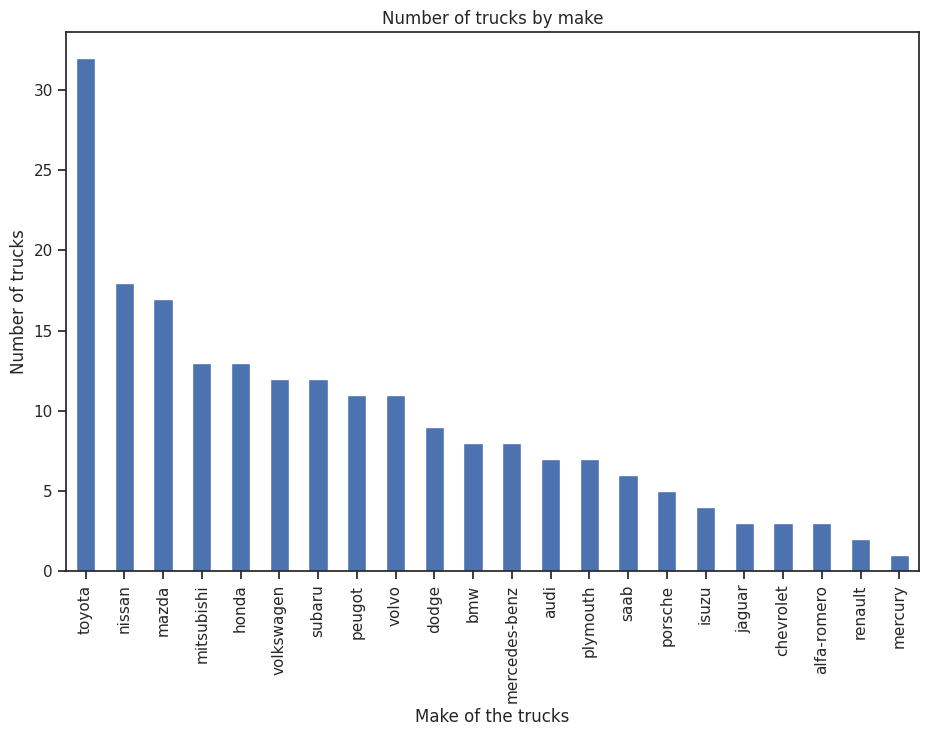

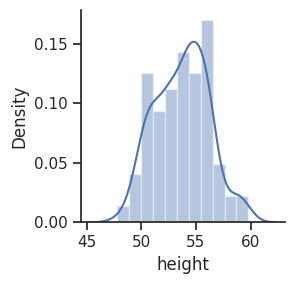

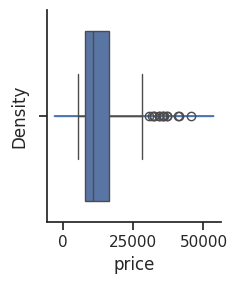

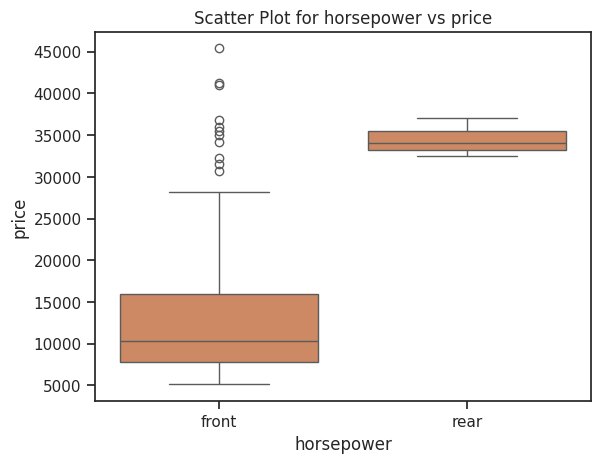

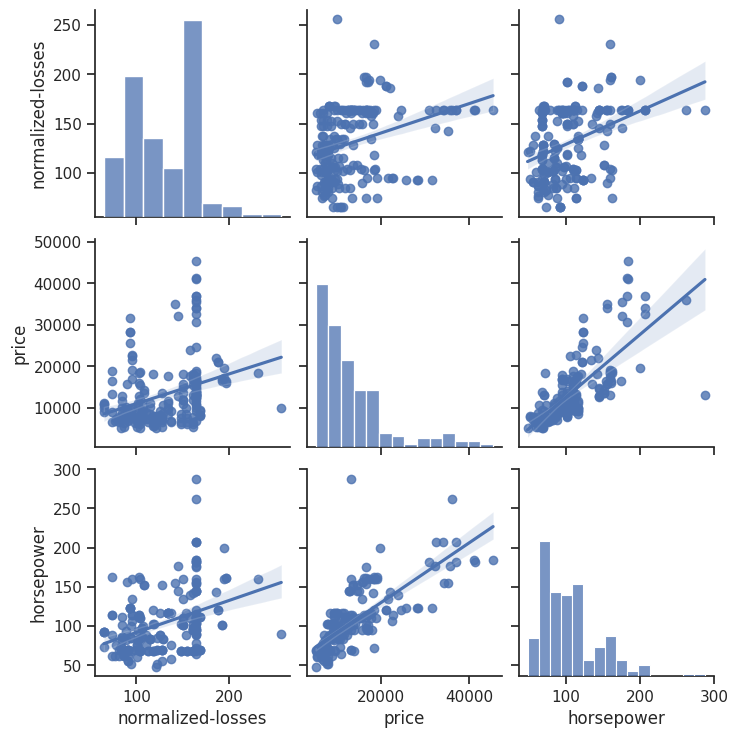

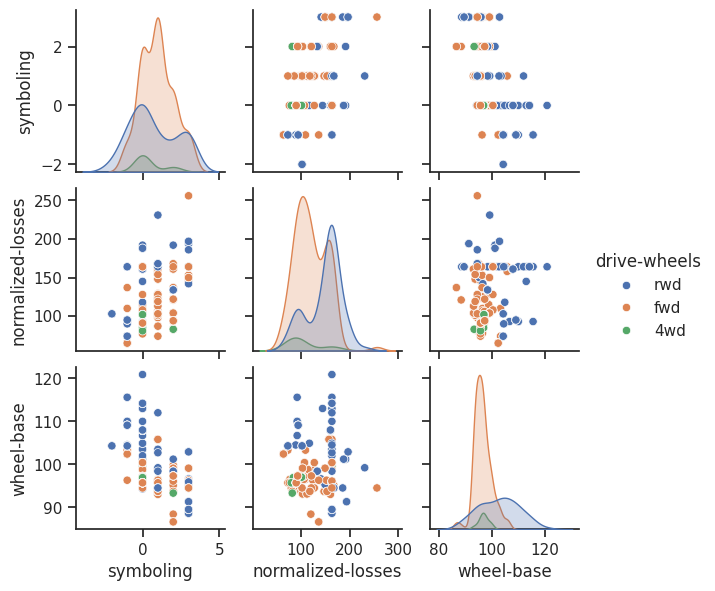

p-value:	 1.591033244659585e-39
cor:		 0.757945621793524


<Axes: >

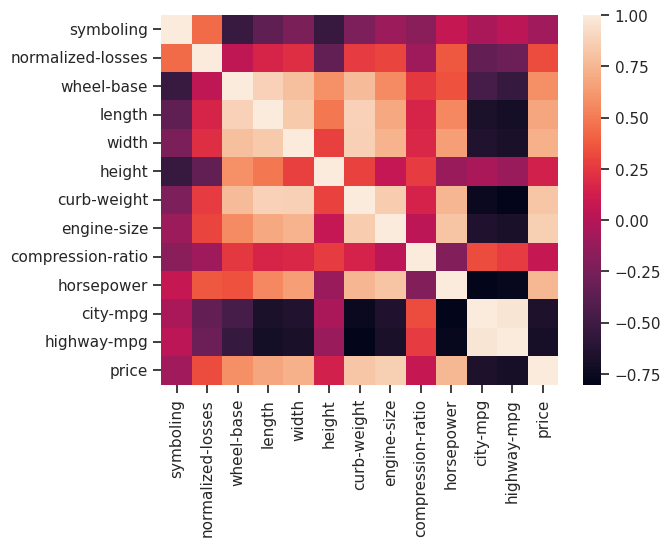

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/data.csv")
print(df.head(3))
print(df.tail(3))

df.dtypes

print(df.describe())
pd.isna(df).any()

df['price'].str.isnumeric().value_counts()

df['price'].str.isnumeric().value_counts()

price = df['price'].loc[df['price'] != '?']
print(price)
pmean = price.astype(int).mean()
print("Mean =",pmean)
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head(10)

horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()


mean = df["height"].mean()
median =df["height"].median()
mode = df["height"].mode()
print(mean , median, mode)

df.make.value_counts().nlargest(40).plot(kind='bar', figsize=(11,7))
plt.title("Number of trucks by make")
plt.ylabel('Number of trucks')
plt.xlabel('Make of the trucks')

sns.FacetGrid(df).map(sns.distplot,"height").add_legend()

sns.FacetGrid(df).map(sns.distplot,"price").add_legend()

sns.boxplot(x="price",data=df)
plt.show()

plt.scatter(df["price"], df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("horsepower")
plt.ylabel("price")

np.corrcoef(df["price"], df["horsepower"])

np.corrcoef(df["horsepower"], df["height"])

sns.boxplot(x="engine-location",y="price",data=df)
plt.show()

sns.pairplot(df,vars = ['normalized-losses', 'price','horsepower'], kind="reg")
plt.show()

sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels")
plt.show()

from scipy import stats

corr = stats.pearsonr(df["price"], df["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

correlation = df.corr(method='pearson', numeric_only=True)
correlation

sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)


